# Advanced quantitative techniques - Class 12 - Growth curves

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import QMSS as qmss

In [2]:
data = pd.read_csv('Data/panel-for-R.csv')
variables = ['idnum', 'panelwave', 'sex', 'age', 'educ', 'race', 'polviews', 'confinan']
sub = data[variables].copy()

sub['n_confinan'] = qmss.reverse_this(sub.confinan)

### Overall trend in confidence in banks

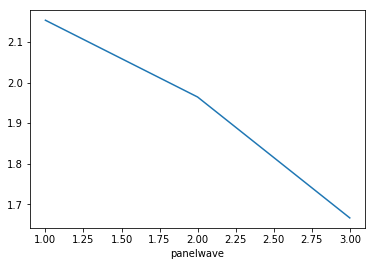

In [7]:
# slide 30
mean_n_confinan = sub.groupby('panelwave')['n_confinan'].mean()

mean_n_confinan.plot()

### Empirical growth curves for the first 200 cases

In [3]:
idnum200_mean = sub[sub.idnum<200].groupby('panelwave')['n_confinan'].mean()

([<matplotlib.axis.XTick at 0x11120fda0>,
 <a list of 3 Text xticklabel objects>)

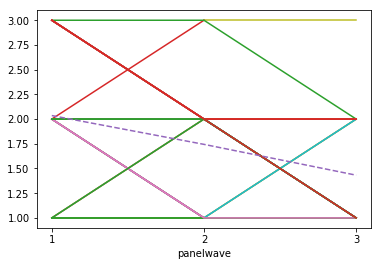

In [36]:
# slide 33
fig, ax = plt.subplots()
sub[sub.idnum<200].groupby('idnum').plot(x='panelwave', y='n_confinan', ax=ax, legend=False)

# plot the general trend on top
idnum200_mean.plot(linestyle='--')
plt.xticks(np.arange(1, 4, 1))

([<matplotlib.axis.XTick at 0x1c20d7b6a0>,
 <a list of 3 Text xticklabel objects>)

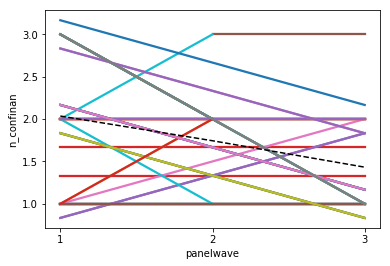

In [37]:
# slide 35

sub_noNA = sub[sub.n_confinan.notna()]
idnums = list(sub_noNA.idnum.unique())

for i in idnums:
    if i < 200:
        sns.regplot(x='panelwave', y='n_confinan', data=sub_noNA[sub_noNA.idnum==i], 
                   ci=False, scatter=False, fit_reg = True, truncate=True)
idnum200_mean.plot(linestyle='--', color='black')
plt.xticks(np.arange(1, 4, 1))

### Overall linear fit

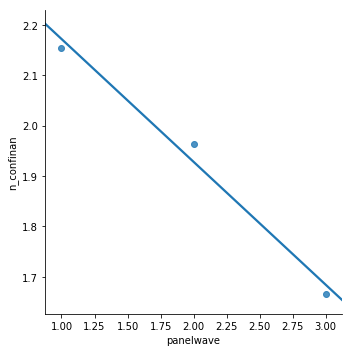

In [18]:
# slide 39

overall_mean = sub.groupby('panelwave')['n_confinan'].mean().to_frame('n_confinan').reset_index(drop=False)
sns.lmplot(x='panelwave', y='n_confinan', data = overall_mean, ci=False, legend=False)

### Overall quadratic fit

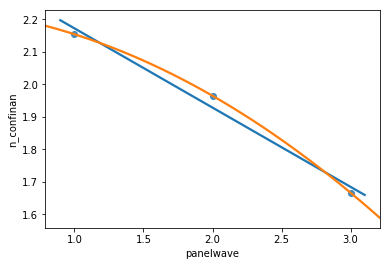

In [32]:
# slide 41
fig, ax = plt.subplots()
sns.regplot(x='panelwave', y='n_confinan', data = overall_mean, ci=False, ax=ax)
sns.regplot(x='panelwave', y='n_confinan', data = sub, order=2, ci=False, scatter=False, ax=ax)

### OLS model with no individual intercepts

In [41]:
from statsmodels.regression.linear_model import OLS

# convert to multiindex dataframe in order to identify grouping
sub = sub.set_index(['idnum', 'panelwave'], drop=False)

OLS.from_formula('n_confinan ~ C(panelwave)', data=sub).fit(cov_type = 'HC0', cluster_entity = True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_confinan   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sat, 05 Jan 2019   Prob (F-statistic):           3.96e-64
Time:                        23:47:58   Log-Likelihood:                -3091.0
No. Observations:                3163   AIC:                             6188.
Df Residuals:                    3160   BIC:                             6206.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.1538      0.018    119.834      0.000       2.119       2.189
C(panelwave)[T.2]    -0.1893      0.027     -6.942      0.000      -0.243      -0.136
C(panelwave)[T.3]    -0.4876      0.028    -17.482      0.000      -0.542      -0.433
==============================================================================
Omnibus:                      143.276   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.526
Skew:                           0.025   Prob(JB):                     1.19e-13
Kurtosis:                       2.330   Cond. No.                         3.43
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [44]:
# slide 45
OLS.from_formula('n_confinan ~ panelwave', data=sub).fit(cov_type = 'HC0', cluster_entity = True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_confinan   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     297.7
Date:                Wed, 22 Aug 2018   Prob (F-statistic):           8.02e-64
Time:                        10:49:03   Log-Likelihood:                -3093.5
No. Observations:                3163   AIC:                             6191.
Df Residuals:                    3161   BIC:                             6203.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4077      0.029     84.357      0.000       2.352       2.464
panelwave     -0.2398      0.014    -17.254      0.000      -0.267      -0.213
==============================================================================
Omnibus:                      143.642   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.686
Skew:                           0.028   Prob(JB):                     1.10e-13
Kurtosis:                       2.329   Cond. No.                         6.10
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model with squared time

In [47]:
sub['panelwavesq'] = np.square(sub.panelwave)

OLS.from_formula('n_confinan ~ panelwave + panelwavesq', data=sub).fit(cov_type = 'HC0', cluster_entity = True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_confinan   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     152.9
Date:                Wed, 22 Aug 2018   Prob (F-statistic):           3.96e-64
Time:                        10:50:55   Log-Likelihood:                -3091.0
No. Observations:                3163   AIC:                             6188.
Df Residuals:                    3160   BIC:                             6206.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2343      0.085     26.424      0.000       2.069       2.400
panelwave      -0.0260      0.099     -0.263      0.792      -0.220       0.168
panelwavesq    -0.0544      0.025     -2.195      0.028      -0.103      -0.006
==============================================================================
Omnibus:                      143.276   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.526
Skew:                           0.025   Prob(JB):                     1.19e-13
Kurtosis:                       2.330   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Random intercept model

In [189]:
# convert back to normal indexing
sub.reset_index(drop=True, inplace=True)

# dropping NA's to bypass error in the mixed-effects model
sub_noNA = sub[~pd.isnull(sub.n_confinan)].copy()

# fitting the random intercept model by maximum likelihood
rim_confinan = smf.mixedlm('n_confinan ~ panelwave', data=sub_noNA, groups=sub_noNA['idnum']).fit(reml=False)
rim_confinan.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: n_confinan
No. Observations: 3163    Method:             ML        
No. Groups:       1324    Scale:              0.2852    
Min. group size:  1       Likelihood:         -2975.9248
Max. group size:  3       Converged:          Yes       
Mean group size:  2.4                                   
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     2.410    0.026  93.342 0.000  2.360  2.461
panelwave    -0.242    0.012 -19.954 0.000 -0.265 -0.218
Group Var     0.129    0.024                            
========================================================

"""

The coefficient displayed for "Group Var" is the variance of the random effects intercept. We can easily obtain the standard deviation by taking the square root of the variance. 

In [141]:
# slide 52
## standard deviation of the random intercept
np.sqrt(rim_confinan.cov_re.iloc[0, 0])

0.35879220330731965

In [116]:
# slide 53
rim_confinan.aic

5959.849531359276

In [142]:
# slide 54
re_var = rim_confinan.cov_re.iloc[0, 0]
resid_var = rim_confinan.resid.var()
rho = re_var/(re_var + resid_var)
rho

0.3632042430004182

### Random intercepts with quadratic time

In [143]:
# slide 56
rim_confinan2 = smf.mixedlm('n_confinan ~ panelwave + I(panelwave**2)', data=sub_noNA, groups=sub_noNA['idnum']).fit(reml=False)
rim_confinan2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
============================================================
Model:              MixedLM  Dependent Variable:  n_confinan
No. Observations:   3163     Method:              ML        
No. Groups:         1324     Scale:               0.2840    
Min. group size:    1        Likelihood:          -2972.1420
Max. group size:    3        Converged:           Yes       
Mean group size:    2.4                                     
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          2.229    0.071 31.496 0.000  2.090  2.368
panelwave         -0.017    0.082 -0.212 0.832 -0.179  0.144
I(panelwave ** 2) -0.057    0.021 -2.754 0.006 -0.098 -0.016
Group Var          0.129    0.024                           
============================================================

"""

In [145]:
rim_confinan2.aic

5954.283935753869

### Random intercepts and random slopes

In [144]:
# slide 59
mx_confinan = smf.mixedlm('n_confinan ~ panelwave', data=sub_noNA, groups=sub_noNA['idnum'], re_formula='~panelwave').fit(reml=False)
mx_confinan.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:               MixedLM    Dependent Variable:    n_confinan
No. Observations:    3163       Method:                ML        
No. Groups:          1324       Scale:                 0.2628    
Min. group size:     1          Likelihood:            -2972.3496
Max. group size:     3          Converged:             Yes       
Mean group size:     2.4                                         
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              2.410    0.027  89.941 0.000  2.358  2.463
panelwave             -0.241    0.012 -19.383 0.000 -0.266 -0.217
Group Var              0.249    0.107                            
Group x panelwave Cov -0.051    0.042                            
panelwave Var          0.022    0.020                            
=================================================================

"""

In [146]:
mx_confinan.aic

5956.699268949113

In [147]:
# slide 61
## standard deviation of random intercept
np.sqrt(mx_confinan.cov_re.iloc[0, 0])

0.499380707405377

In [150]:
# slide 62
## standard deviation of random slope
np.sqrt(mx_confinan.cov_re.iloc[1, 1])

0.1494424193056081

In [165]:
# slide 63
## We can compute the correlation between the random intercept and random slope with the following steps:

# get dictionary containing random intercept and slope for each group
mx_confinan_re = mx_confinan.random_effects

# make an array of all random intercepts
re_intercepts = np.asarray([i[0] for i in mx_confinan_re.values()])

# make an array of all random slopes
re_slopes = np.asarray([i[1] for i in mx_confinan_re.values()])

# compute correlation
np.corrcoef(re_intercepts, re_slopes)

array([[ 1.        , -0.67608942],
       [-0.67608942,  1.        ]])

### Are random slopes necessary?

(slide 65)   

Since the `mixedlm` module does not come with an anova method, we can calculate the chi-sq statistic and associated p-value by hand:

In [242]:
# chisq = (-2)*loglikelihood(model1) + 2*loglikelihood(model2)
chisq = -2*rim_confinan.llf + 2*mx_confinan.llf

# degree of freedom in model1 - degree of freedom in model2
deg_fr = (rim_confinan.df_resid - rim_confinan.df_modelwc) - (mx_confinan.df_resid - mx_confinan.df_modelwc)

In [243]:
from scipy import stats

# p-value
1 - stats.chi2.cdf(chisq, deg_fr)

0.028011750249127165

### Adding time-invariant variables

In [191]:
# slide 68
sub_noNA['male'] = np.where(pd.isnull(sub_noNA.sex), np.nan, 
                           np.where(sub_noNA.sex==1, 'male', 'female'))

mx_confinan2 = smf.mixedlm('n_confinan ~ panelwave + male', data=sub_noNA, groups=sub_noNA['idnum'], re_formula='~panelwave').fit(reml=False)
mx_confinan2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:               MixedLM    Dependent Variable:    n_confinan
No. Observations:    3163       Method:                ML        
No. Groups:          1324       Scale:                 0.2630    
Min. group size:     1          Likelihood:            -2964.6288
Max. group size:     3          Converged:             Yes       
Mean group size:     2.4                                         
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              2.457    0.029  83.677 0.000  2.399  2.515
male[T.male]          -0.110    0.028  -3.944 0.000 -0.165 -0.056
panelwave             -0.242    0.012 -19.460 0.000 -0.266 -0.217
Group Var              0.254    0.107                            
Group x panelwave Cov -0.053    0.042                            
panelwave Var          0.022    0.020                            
=================================================================

"""

### Adding time-varying variables too

In [193]:
# slide 69

## Remove observations with NA in 'polviews' because the Python model doesn't do it automatically. 
## Otherwise an error is raised.
sub_noNA2 = sub_noNA[~pd.isnull(sub_noNA.polviews)].copy()

mx_confinan3 = smf.mixedlm('n_confinan ~ panelwave + male + polviews', data=sub_noNA2, groups=sub_noNA2['idnum'], re_formula='~panelwave').fit(reml=False)
mx_confinan3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:               MixedLM    Dependent Variable:    n_confinan
No. Observations:    3069       Method:                ML        
No. Groups:          1301       Scale:                 0.2610    
Min. group size:     1          Likelihood:            -2871.8225
Max. group size:     3          Converged:             Yes       
Mean group size:     2.4                                         
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              2.395    0.046  52.002 0.000  2.305  2.486
male[T.male]          -0.104    0.028  -3.685 0.000 -0.159 -0.049
panelwave             -0.243    0.013 -19.188 0.000 -0.268 -0.218
polviews               0.016    0.009   1.839 0.066 -0.001  0.033
Group Var              0.261    0.111                            
Group x panelwave Cov -0.057    0.043                            
panelwave Var          0.024    0.021                            
=================================================================

"""

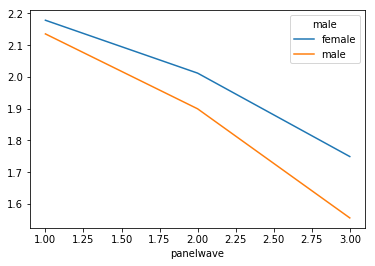

In [187]:
n_confinan_by_sex = sub_noNA.groupby(['panelwave', 'male'])['n_confinan'].mean().unstack()
n_confinan_by_sex.plot()

### Add a time-invariant variable

In [194]:
# slide 73
mx_confinan4 = smf.mixedlm('n_confinan ~ panelwave + male + male:panelwave', data=sub_noNA, groups=sub_noNA['idnum'], re_formula='~panelwave').fit(reml=False)
mx_confinan4.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
==================================================================
Model:                MixedLM    Dependent Variable:    n_confinan
No. Observations:     3163       Method:                ML        
No. Groups:           1324       Scale:                 0.2635    
Min. group size:      1          Likelihood:            -2959.4270
Max. group size:      3          Converged:             Yes       
Mean group size:      2.4                                         
------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept               2.395    0.035  68.320 0.000  2.326  2.463
male[T.male]            0.040    0.054   0.741 0.458 -0.066  0.147
panelwave              -0.208    0.016 -12.928 0.000 -0.240 -0.177
male[T.male]:panelwave -0.081    0.025  -3.237 0.001 -0.131 -0.032
Group Var               0.247    0.106                            
Group x panelwave Cov  -0.049    0.041                            
panelwave Var           0.020    0.020                            
==================================================================

"""

### Predicted curves for men and women

In [207]:
sub_noNA['fitted'] = mx_confinan4.fittedvalues

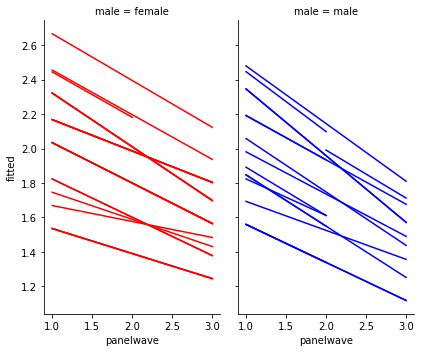

In [224]:
model_dat = sub_noNA[sub_noNA.idnum<200]

g = sns.FacetGrid(model_dat, col='male', hue='male', palette={'female':'red', 'male':'blue'}, height=5, aspect=0.6)
g = g.map_dataframe(sns.lineplot, 'panelwave', 'fitted', units='idnum', estimator=None)

### Random intercepts/random slopes for men

In [230]:
# slide 77
sub_M = sub_noNA[sub_noNA.sex==1]
mx_confinanM = smf.mixedlm('n_confinan ~ panelwave', data=sub_M,
                            groups=sub_M['idnum'], re_formula='~panelwave').fit(reml=False)
mx_confinanM.summary() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:               MixedLM    Dependent Variable:    n_confinan
No. Observations:    1309       Method:                ML        
No. Groups:          568        Scale:                 0.2768    
Min. group size:     1          Likelihood:            -1247.3355
Max. group size:     3          Converged:             Yes       
Mean group size:     2.3                                         
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              2.438    0.042  57.532 0.000  2.355  2.521
panelwave             -0.292    0.019 -15.269 0.000 -0.330 -0.255
Group Var              0.259    0.170                            
Group x panelwave Cov -0.042    0.064                            
panelwave Var          0.011    0.030                            
=================================================================

"""

### Random intercepts/random slopes for women

In [233]:
sub_F = sub_noNA[sub_noNA.sex==2]
mx_confinanF = smf.mixedlm('n_confinan ~ panelwave', data=sub_F,
                            groups=sub_F['idnum'], re_formula='~panelwave').fit(reml=False)
mx_confinanF.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:               MixedLM    Dependent Variable:    n_confinan
No. Observations:    1854       Method:                ML        
No. Groups:          777        Scale:                 0.2483    
Min. group size:     1          Likelihood:            -1708.9855
Max. group size:     3          Converged:             Yes       
Mean group size:     2.4                                         
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              2.397    0.035  69.443 0.000  2.330  2.465
panelwave             -0.210    0.016 -12.911 0.000 -0.241 -0.178
Group Var              0.252    0.140                            
Group x panelwave Cov -0.060    0.056                            
panelwave Var          0.029    0.027                            
=================================================================

"""